In [3]:
!pip install wordcloud

In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 




In [5]:
 data = pd.read_csv("netflix1.csv")

In [6]:
#Display the first Few rows of the dataset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [10]:
#Check for Missing Values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [11]:
#Drop Dupllicate if any 
data.drop_duplicates(inplace = True)

In [12]:
#Drops rows with missing critical information 
data.dropna(subset = ["director",  "country"],inplace = True )

In [75]:
#Convert "date_added" to datetime data["date_added"]
data['date_added'] = pd.to_datetime(data['date_added'])
print(data['date_added'])


0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]


In [77]:
#Show data types to confirm changes 
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
genres                  object
year_added               int32
month_added              int32
day_added                int32
dtype: object


In [79]:
#Content Type Distribution (Movies vs. Tv Shows)
#1Count number of movies and TV Showss
type_counts = data["type"].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


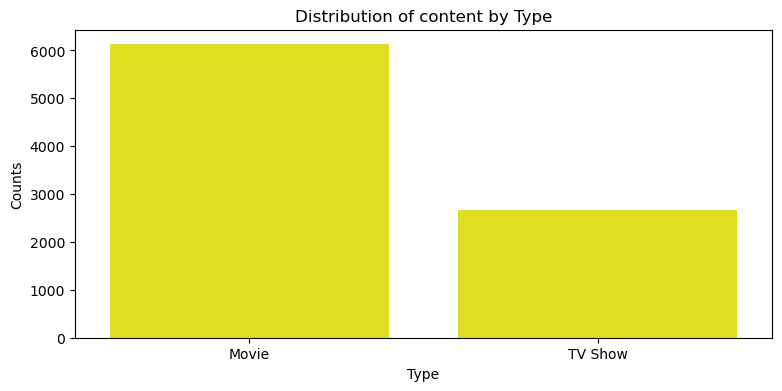

In [27]:
#Plot the distribution 
plt.figure(figsize = (9,4))

sns.barplot(x = type_counts.index, y = type_counts.values, color = "yellow")
plt.title("Distribution of content by Type")
plt.xlabel("Type")
plt.ylabel("Counts")
plt.show()

In [28]:
#Most Common Genres 
#1 split the "listed_in" columncand count genres .
data["genres"] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genres_counts = pd.Series(all_genres).value_counts().head(10)
print(genres_counts)

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64


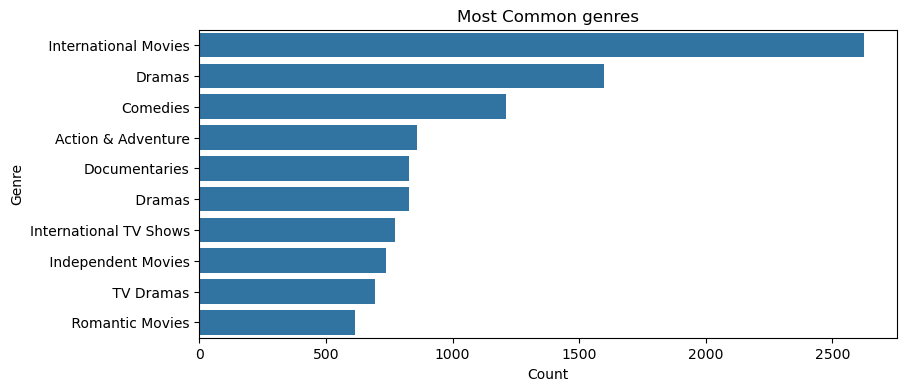

In [30]:
#Plot the Most Common genres 
plt.figure(figsize = (9,4))

sns.barplot(x = genres_counts.values, y = genres_counts.index)
plt.title("Most Common genres")
plt.xlabel("Count", fontsize = 10 )
plt.ylabel("Genre")
plt.show()

In [115]:
#Content Added Over Time
#1 Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added']   = data['date_added'].dt.day

In [119]:
data['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: year_added, Length: 8790, dtype: int32

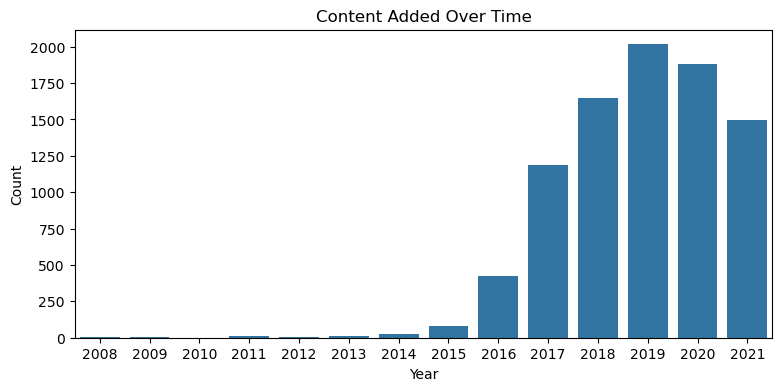

In [33]:
#Plot content added over the years 
plt.figure(figsize = (9,4))

sns.countplot(x = "year_added", data = data)
plt.title("Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [36]:
#Top 10 Directors With the Most Titles
#1 Count the title by director .
top_directors = data['director'].value_counts().head(10)
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

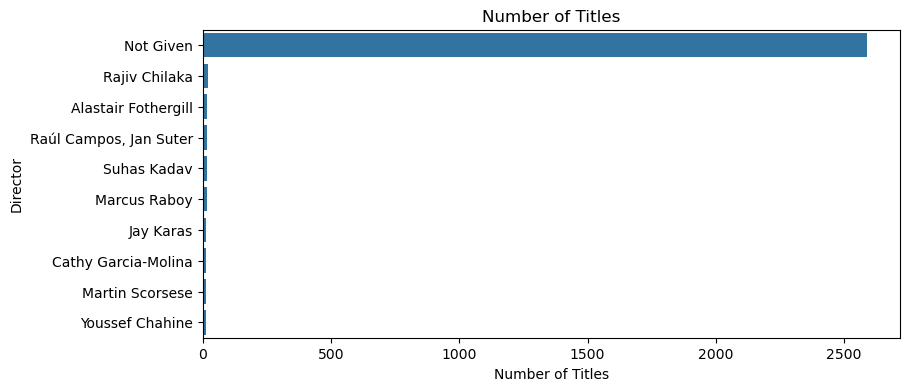

In [37]:
#Plot top directors 
plt.figure(figsize = (9,4))

sns.barplot(x = top_directors.values, y = top_directors.index)
plt.title("Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()
                      

In [40]:
from wordcloud import WordCloud


In [43]:
movie_titles = data[data['type'] == 'Movie']['title']

In [45]:
movie_titles

0                   Dick Johnson Is Dead
3       Confessions of an Invisible Girl
4                                Sankofa
6                           The Starling
7        Motu Patlu in the Game of Zones
                      ...               
8702                            The Bund
8707                    The Darkest Dawn
8716                    The Great Battle
8763         Twisted Trunk, Big Fat Body
8783                Yoko and His Friends
Name: title, Length: 6126, dtype: object

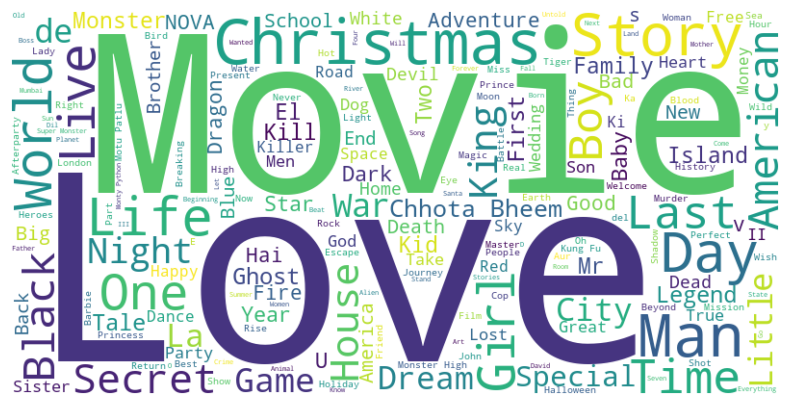

In [47]:
# Generate word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(movie_titles))

# Display the generated WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

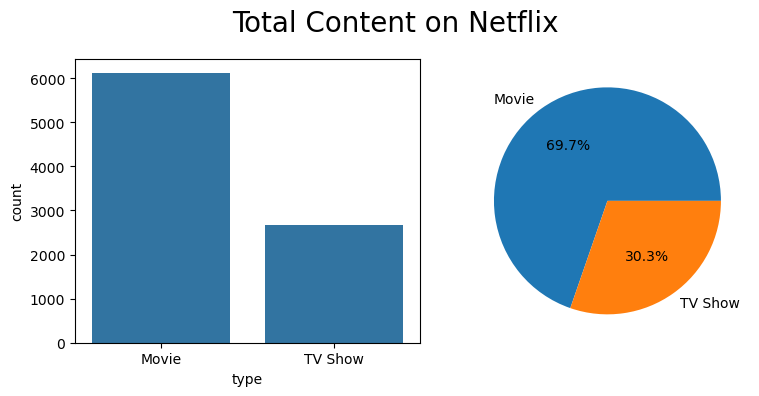

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame
freq = data['type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Countplot on the first subplot
sns.countplot(data=data, x='type', ax=axes[0])

# Pie chart on the second subplot
axes[1].pie(freq, labels=freq.index, autopct='%.1f%%')

# Adding title for the entire figure
plt.suptitle("Total Content on Netflix", fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()



In [49]:
# Visual representation of rating frequency of movies and TV Shows on Netflix
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

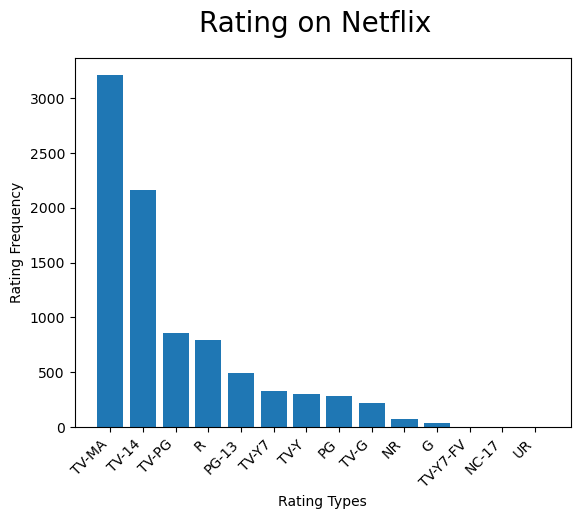

In [50]:
ratings = data['rating'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')

plt.suptitle('Rating on Netflix', fontsize = 20)

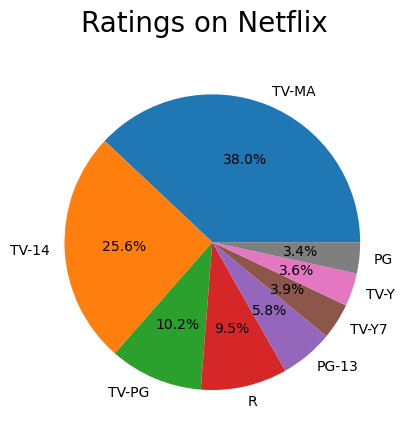

In [52]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.1f%%')
plt.suptitle('Ratings on Netflix', fontsize=20)

plt.show()


In [55]:
data.describe()

,date_added,release_year,year_added,month_added,day_added
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,12.500000
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,1.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,13.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,20.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,31.000000
std,NaN,8.825466,1.573568,3.436103,9.887635


In [58]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

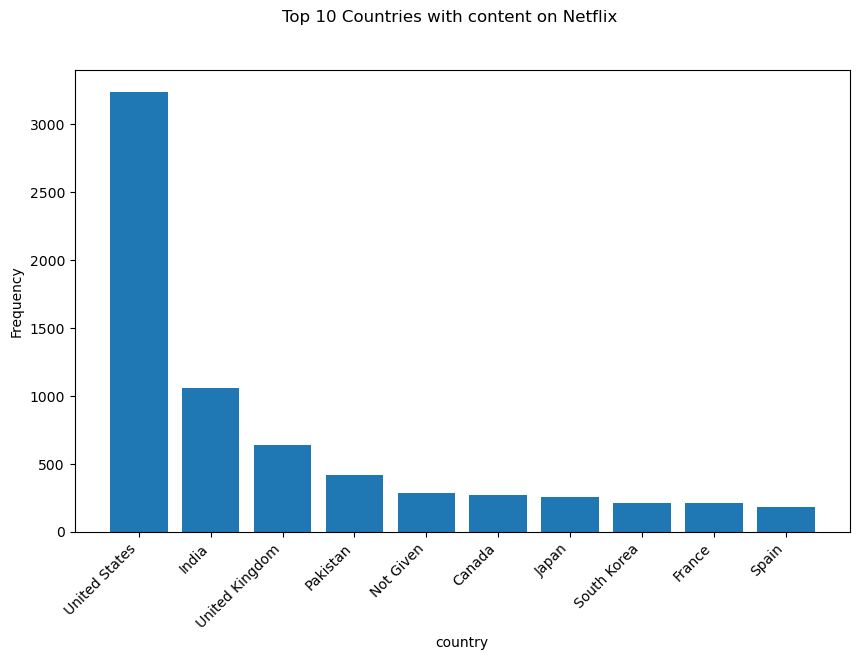

In [61]:
#Top 10 Countries with Most content on Netflix

top_ten_countries = data['country'].value_counts().reset_index().sort_values(by = 'count', 
ascending = False) [:10]

plt.figure(figsize = (10, 6))

plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('country')
plt.ylabel("Frequency")
plt.suptitle("Top 10 Countries with content on Netflix")
plt.show()                                                                             
                                                                             

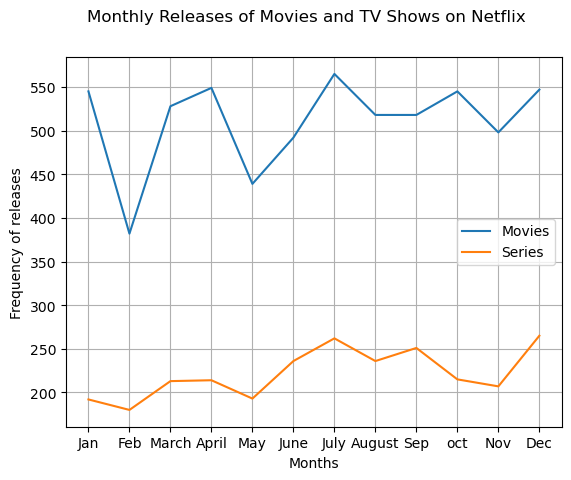

In [87]:
#Monthly releases of Movies and TV shows on Netflix
monthly_movie_release = data[data['type']=='Movie']['month_added'].value_counts().sort_index()

monthly_series_release = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label = 'Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label = "Series")
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August'
, 'Sep', 'oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly Releases of Movies and TV Shows on Netflix")
plt.show()

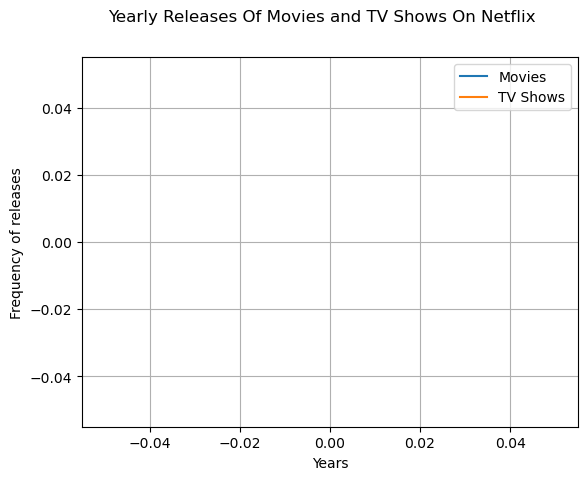

In [141]:
#Yearly releases of Movies and TV Shows on Netflix

yearly_movies_releases = data[data['type']=='movie']['year_added'].value_counts().sort_index()

yearly_series_releases = data[data['type']=='TV Shows']['year_added'].value_counts().sort_index()

plt.plot(yearly_movies_releases.index, yearly_movies_releases.values, label = 'Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label = "TV Shows")
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly Releases Of Movies and TV Shows On Netflix")
plt.legend()



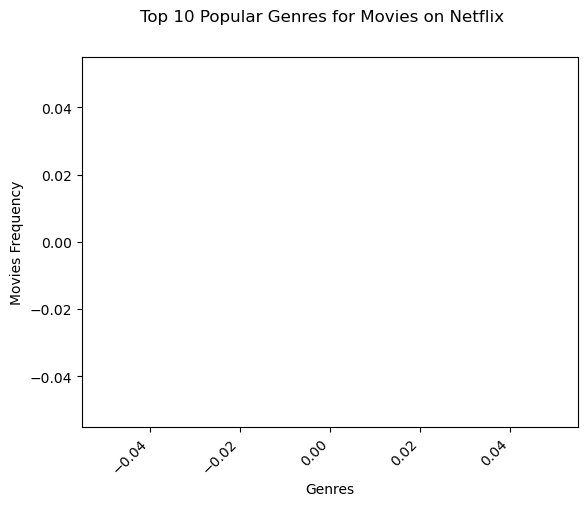

In [151]:
#Top 10 popular movie genres
# Grouping by 'listed_in' to get the frequency of genres for Movies and TV Shows
popular_movies_genres = data[data['type'] == 'movie'].groupby("listed_in").size().sort_values(ascending=False).head(10)
popular_series_genres = data[data['type'] == 'TV Show'].groupby("listed_in").size().sort_values(ascending=False).head(10)

# Plotting the top 10 movie genres
plt.bar(popular_movies_genres.index, popular_movies_genres.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 Popular Genres for Movies on Netflix")
plt.show()
